In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import copy, random, matplotlib
import pandas as pd

# Cleaning the Dataset
The original monthly data points are recorded horizontally for each employee, which is not good for analyzing data.

See MonthlyPositionTracker.xlsx dataset for details 

In [5]:
#Reading the original dataset(the orginal data points are recorded vertically and are not analyzable)
dfs = pd.read_excel("MonthlyPositionTracker.xlsx", header=1)
dfs

,Position #,Position Description,FTE Percent,Location,2019 Budgeted Salary,Employee #,Filled Position Description,Filled FTE Percent,Current Salary,Employee #.1,...,Filled FTE Percent.21,Current Salary.21,Employee #.22,Filled Position Description.22,Filled FTE Percent.22,Current Salary.22,Employee #.23,Filled Position Description.23,Filled FTE Percent.23,Current Salary.23
0,1,ASST CITY ATTY,1.0,ATTORNEY,154755.00000,3504,ASST CITY ATTY,1.0,143627.12,3504,...,1,154162,3504,ASST CITY ATTY-23,1,154162,3504,ASST CITY ATTY-23,1,154162
1,2,LITIGATION ASST 1,1.0,ATTORNEY,71788.00000,2114,LITIGATION ASST 1,1.0,67231.58,2114,...,1,71513.3,2114,LITIGATION ASST 1-17,1,71513.3,2114,LITIGATION ASST 1-17,1,71513.3
2,3,CLERK-TYP 2,1.0,ATTORNEY,52210.00000,1351,CLERK-TYP 2,1.0,48896.12,1351,...,1,52010.1,1351,CLERK-TYP 2-20,1,52010.1,1351,CLERK-TYP 2-20,1,52010.1
3,4,ASST CITY ATTY,1.0,ATTORNEY,154755.00000,3630,ASST CITY ATTY,1.0,144932.84,3630,...,1,154162,3630,ASST CITY ATTY-23,1,154162,3630,ASST CITY ATTY-23,1,154162
4,6,SECRETARY 3-LEGAL,1.0,ATTORNEY,64233.00000,3074,SECRETARY 3-LEGAL,1.0,59614.10,3074,...,1,63987,3074,SECRETARY 3-LEGAL-17,1,63987,3074,SECRETARY 3-LEGAL-17,1,63987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,4778,DETECTIVE 1,1.0,POLICE,85781.40095,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT
3013,4779,POLICE OFFICER,1.0,POLICE,51750.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VACANT,VACANT,VACANT,VACANT,10680,POLICE OFFICER-11,1,57178.7
3014,4780,HR SERVS MANAGER,1.0,POLICE,43400.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT
3015,4781,NEW POSITION,1.0,CDA HOUSIN,53677.26000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT,VACANT


In [6]:
#Cleaning the original data set
dfs=dfs.fillna("VACANT")
for i in dfs:
    if i[:15]=="Filled Position":
        for j in range(len(dfs[i])):
            dfs[i][j]=dfs["Position Description"][j]
for i in dfs:
    if i[:15]=="Filled Position":
        dfs.rename(columns={i: 'Filled Position Description'}, inplace=True) 
    if i[:10]=="Employee #":
        dfs.rename(columns={i: 'Employee #'}, inplace=True) 
    if i[:7]=="Current":
        dfs.rename(columns={i: 'Current Salary'}, inplace=True) 
    if i[:10]=="Filled FTE":
        dfs.rename(columns={i: 'Filled FTE Percent'}, inplace=True) 

c:\users\xi97x\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#Combining same columns/variables together
employ = dfs["Employee #"]
employ_col = pd.concat([employ, employ.T.stack().reset_index(name='Employee Number')['Employee Number']], axis=1)

Position = dfs["Filled Position Description"]
des_col = pd.concat([Position, Position.T.stack().reset_index(name='Position Description')['Position Description']], axis=1)

Salary = dfs["Current Salary"]
sal_col = pd.concat([Salary, Salary.T.stack().reset_index(name='Salary')['Salary']], axis=1)

FTE = dfs["Filled FTE Percent"]
FTE_col = pd.concat([FTE, FTE.T.stack().reset_index(name='Filled FTE')['Filled FTE']], axis=1)

new_table = pd.concat([dfs]*24, ignore_index=True)
Location_col = new_table["Location"]
Position_num = new_table["Position #"]
Budget_2019_col = new_table["2019 Budgeted Salary"]

0             1
1             1
2             1
3             1
4             1
          ...  
72403    VACANT
72404         1
72405    VACANT
72406    VACANT
72407    VACANT
Name: Filled FTE, Length: 72408, dtype: object

In [12]:
#Adding month column to the dataset
Month = ['March','April','May','June','July','August','September','October','November','December','January','February']*2
Month_col = []
for x in Month:
    for m in range(3017):
        Month_col.append(x)
        
year=['2017']*10
year_col_2017 = []
for x in year:
    for m in range(3017):
        year_col_2017.append(x)
year=['2018']*12
year_col_2018 = []

for x in year:
    for m in range(3017):
        year_col_2018.append(x)
year=['2019']*2
year_col_2019 = []

for x in year:
    for m in range(3017):
        year_col_2019.append(x)
year_col = year_col_2017+year_col_2018+year_col_2019

In [13]:
#Analyzable new table
new = {'Location':Location_col,'Position #':Position_num,'Position Description':des_col['Position Description'],'Current Salary':sal_col['Salary'],'Filled FTE Percent':FTE_col['Filled FTE'],'Employee #':employ_col['Employee Number'],"Month":Month_col,"Year":year_col,"2019 Budgeted Salary":Budget_2019_col}
pd_new = pd.DataFrame(new)
pd_new

,Location,Position #,Position Description,Current Salary,Filled FTE Percent,Employee #,Month,Year,2019 Budgeted Salary
0,ATTORNEY,1,ASST CITY ATTY,143627,1,3504,March,2017,154755
1,ATTORNEY,2,LITIGATION ASST 1,67231.6,1,2114,March,2017,71788
2,ATTORNEY,3,CLERK-TYP 2,48896.1,1,1351,March,2017,52210
3,ATTORNEY,4,ASST CITY ATTY,144933,1,3630,March,2017,154755
4,ATTORNEY,6,SECRETARY 3-LEGAL,59614.1,1,3074,March,2017,64233
...,...,...,...,...,...,...,...,...,...
72403,POLICE,4778,DETECTIVE 1,VACANT,VACANT,VACANT,February,2019,85781.4
72404,POLICE,4779,POLICE OFFICER,57178.7,1,10680,February,2019,51750
72405,POLICE,4780,HR SERVS MANAGER,VACANT,VACANT,VACANT,February,2019,43400
72406,CDA HOUSIN,4781,NEW POSITION,VACANT,VACANT,VACANT,February,2019,53677.3


In [14]:
#Selecting the Engineering Department
Eng_Salary = pd_new[pd_new["Location"]=="ENGINEERIN"]
Eng_Salary

In [17]:
#removing NA/clean data set 
Eng_Salary_na = Eng_Salary.dropna()
#removing Vacant
Eng_Salary_na = Eng_Salary_na[(Eng_Salary_na["Employee #"] != "VACANT") & (Eng_Salary_na["Current Salary"] != "-")&(Eng_Salary_na["Position Description"] != "VACANT") & (Eng_Salary_na["Month"] != "VACANT") & (Eng_Salary_na["Filled FTE Percent"] != "VACANT") & (Eng_Salary_na["Current Salary"] != "VACANT") & (Eng_Salary_na["Year"] != "VACANT") ]
#Changing the data type of salary
Eng_Salary_na["Current Salary"] = Eng_Salary_na["Current Salary"].astype(int)
Eng_Salary_na["Year"] = Eng_Salary_na["Year"].astype(int).astype(str)
#Using numbers to represent months
def label_month (row):
    if row['Month'] == "January" :
        return "01"
    if row['Month'] == "February" :
        return "02"
    if row['Month'] == "March" :
        return "03"
    if row['Month'] == "April" :
        return "04"
    if row['Month'] == "May" :
        return "05"
    if row['Month'] == "June" :
        return "06"
    if row['Month'] == "July" :
        return "07"
    if row['Month'] == "August" :
        return "08"
    if row['Month'] == "September" :
        return "09"
    if row['Month'] == "October" :
        return "10"
    if row['Month'] == "November" :
        return "11"
    if row['Month'] == "December" :
        return "12"
Eng_Salary_na['Month in Number'] = Eng_Salary_na.apply (lambda row: label_month(row), axis=1)
#new column-YearMonth(combining year and month together)
Eng_Salary_na["YearMonth"] = Eng_Salary_na["Year"] + "/" + Eng_Salary_na["Month in Number"]
Eng_Salary_na.drop(columns=['Month in Number', 'Month','Year','Employee #','Position #','2019 Budgeted Salary'])

,Location,Position Description,Current Salary,Filled FTE Percent,YearMonth
174,ENGINEERIN,CUSTODIAL WKR 2,54262,1,2017/03
175,ENGINEERIN,ARCHITECT 4,102465,1,2017/03
182,ENGINEERIN,ENGINEER 3,84656,1,2017/03
186,ENGINEERIN,MAINT MECH 2,68201,1,2017/03
191,ENGINEERIN,CUSTODIAL WKR 2,51355,1,2017/03
...,...,...,...,...,...
72298,ENGINEERIN,CONSTRUCTION MGR,83377,1,2019/02
72299,ENGINEERIN,ENGINEER 3,83377,1,2019/02
72339,ENGINEERIN,ENGINEER 2,74669,1,2019/02
72340,ENGINEERIN,ARCHITECT AIDE 1,52979,1,2019/02


# Employees' Average Monthly Salary VS. Job Position 
Using a bar chart to determine whether there is a relationship between an employees' average current yearly salary and job position

y-axis: average current yearly salary

x-axis: Position

Result: Employees' job position is important

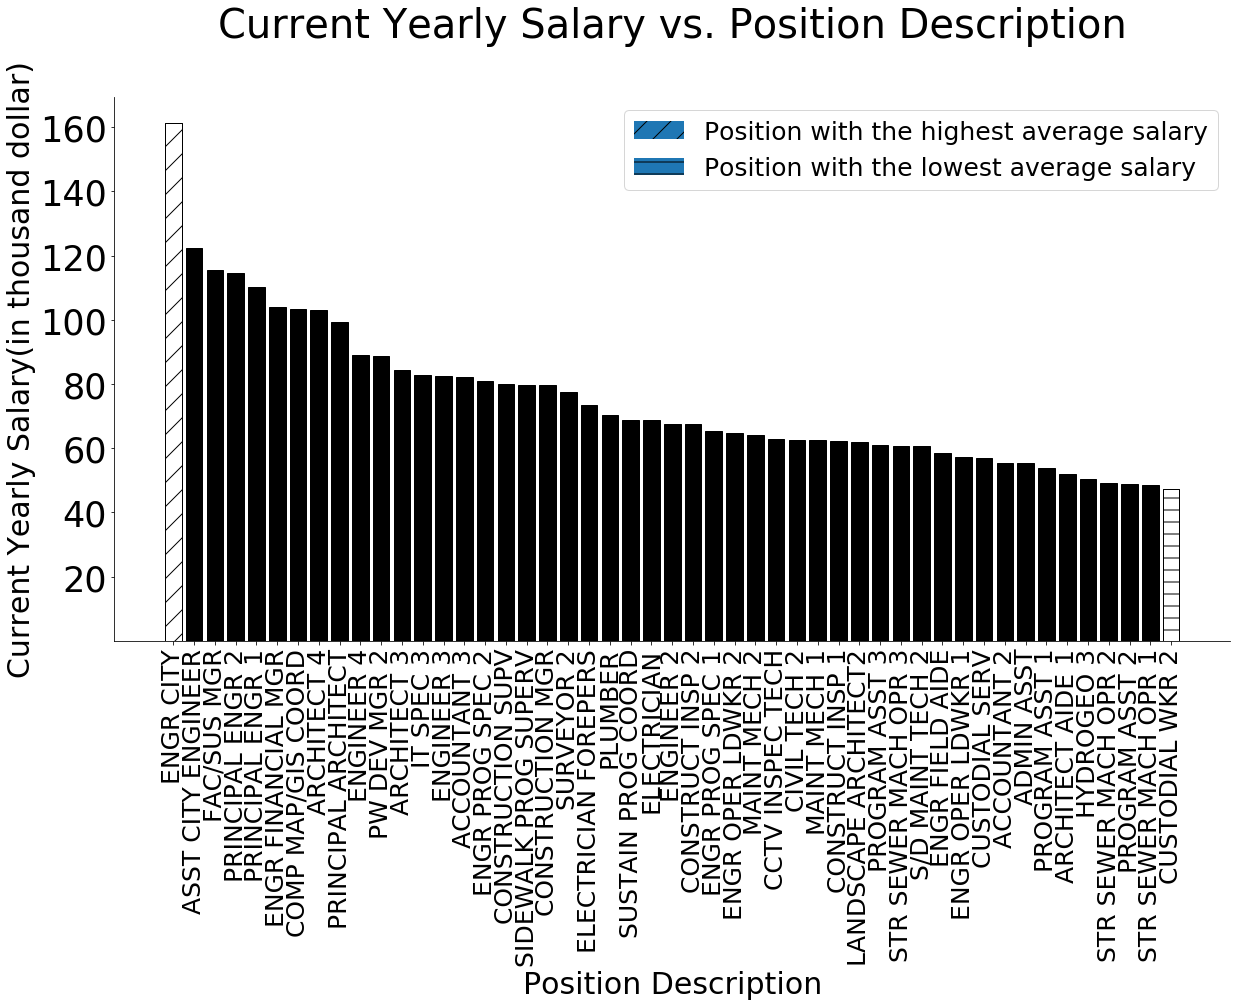

In [19]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
patterns = [ "/","-" ]
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
bx = Eng_Salary_na.groupby("Position Description")["Current Salary"].mean().reset_index().sort_values(['Current Salary'],ascending=False) 
plt.rcParams["figure.figsize"] = [20,10]

plt.bar(bx["Position Description"], bx["Current Salary"], color='black',edgecolor = "black")
plt.bar(bx["Position Description"][21], bx["Current Salary"][21],hatch=patterns[0],color='white',edgecolor = "black")
plt.bar(bx["Position Description"][15], bx["Current Salary"][15],hatch=patterns[1],color='white',edgecolor = "black" )

plt.title('Current Yearly Salary vs. Position Description',fontsize=40,pad=60)
plt.xlabel('Position Description',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.ylabel('Current Yearly Salary(in thousand dollar)',fontsize=30)
plt.yticks([20000,40000,60000,80000,100000,120000,140000,160000],
        ['20','40','60','80','100','120','140','160'],fontsize=35)
red_patch = mpatches.Patch(hatch=patterns[0], label='Position with the highest average salary')
blue_patch = mpatches.Patch(hatch=patterns[1], label='Position with the lowest average salary')
plt.legend(handles=[red_patch,blue_patch],fontsize = 25)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Employees' Average Monthly Salary VS. Month
Using a bar chart to determine whether there is a relationship between employees' average  yearly salary and month

y-axis: average current yearly salary

x-axis: Month

Result: No significant relationship

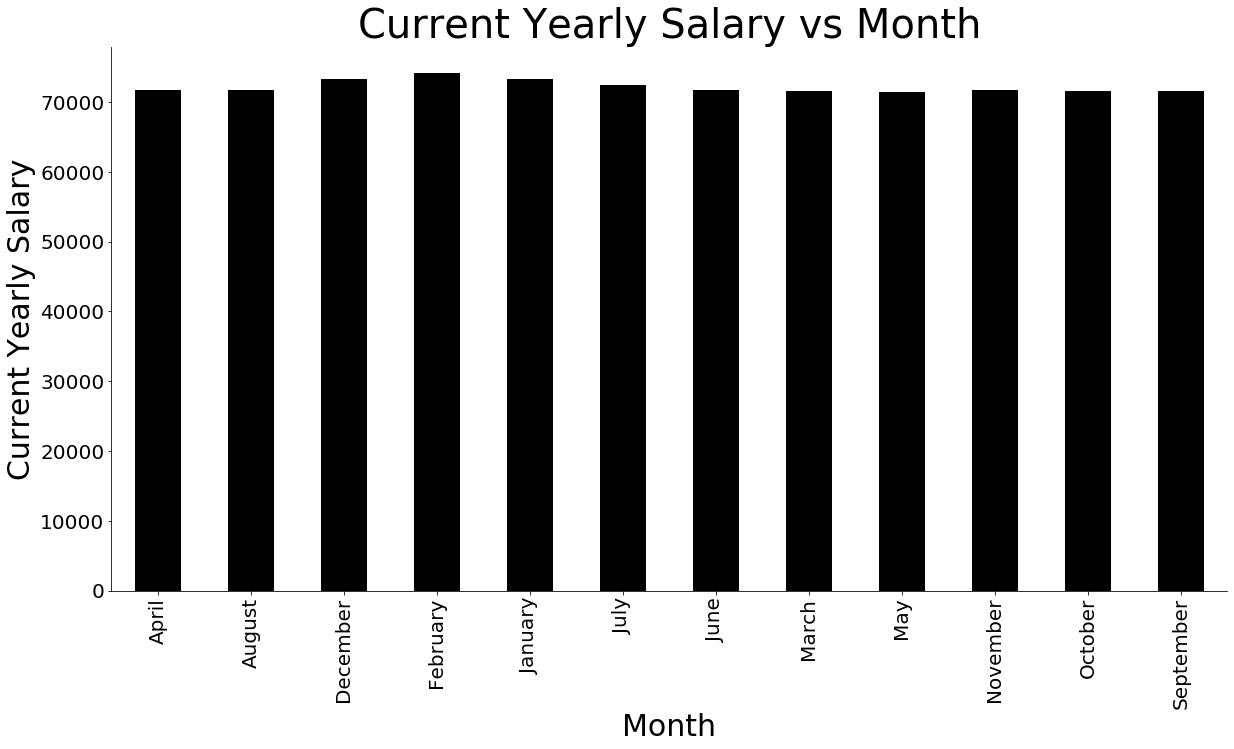

In [24]:
#Average salary based different months
Eng_Salary_na.groupby("Month")["Current Salary"].mean().plot(kind = 'bar',color = 'black') 
plt.title('Current Yearly Salary vs Month',fontsize = 40)
plt.xlabel('Month',fontsize = 30)
plt.ylabel('Current Yearly Salary',fontsize = 30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Employee Turnover and Salary
This section is used to determine whether employee turnover(number of retire people+number of hire people) would be affected by salary levels according to different salary levels.

y-axis: turnover

x-axis: Time(Year/Month)

Result: No significant relationship

In [25]:
def turnover(Dataset,low,high):
    dat_2017 = Dataset[(Dataset["Year"] =="2017")&(Dataset["Current Salary"] <=high)&(Dataset["Current Salary"] >low)]
    ls = {}
    prob=[]
    for i in ["March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2017[dat_2017["Month"] ==i]
        ls[i] = []
        for item in dat["Employee #"]:
            ls[i].append(item)
    num1 = 0
    num2 = 0
    for i in ls["March"]:
        if not i in ls["April"]:
            num1 +=1
    for i in ls["April"]:
        if not i in ls["March"]:
            num2 +=1
    prob.append(num1+num2)
    
    num1 = 0
    num2 = 0
    for i in ls["April"]:
        if not i in ls["May"]:
            num1 +=1
    for i in ls["May"]:
        if not i in ls["April"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls["May"]:
        if not i in ls["June"]:
            num1 +=1
    for i in ls["June"]:
        if not i in ls["May"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls["June"]:
        if not i in ls["July"]:
            num1 +=1
    for i in ls["July"]:
        if not i in ls["June"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls["July"]:
        if not i in ls["August"]:
            num1 +=1
    for i in ls["August"]:
        if not i in ls["July"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls["August"]:
        if not i in ls["September"]:
            num1 +=1
    for i in ls["September"]:
        if not i in ls["August"]:
            num2 +=1
    prob.append(num1+num2)
    
    num1 = 0
    num2 = 0
    for i in ls["September"]:
        if not i in ls["October"]:
            num1 +=1
    for i in ls["October"]:
        if not i in ls["September"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls["October"]:
        if not i in ls["November"]:
            num1 +=1
    for i in ls["November"]:
        if not i in ls["October"]:
            num2 +=1
    prob.append(num1+num2)
    
    
    num1 = 0
    num2 = 0
    for i in ls["November"]:
        if not i in ls["December"]:
            num1 +=1
    for i in ls["December"]:
        if not i in ls["November"]:
            num2 +=1
    prob.append(num1+num2)
    
    dat_2018 = Dataset[(Dataset["Year"] =="2018")&(Dataset["Current Salary"] <=high)&(Dataset["Current Salary"] >low)]
    ls1 = {}
    for i in ["January","February","March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2018[dat_2018["Month"] ==i]
        ls1[i] = []
        for item in dat["Employee #"]:
            ls1[i].append(item)
            
    num1 = 0
    num2 = 0
    for i in ls["December"]:
        if not i in ls1["January"]:
            num1 +=1
    for i in ls1["January"]:
        if not i in ls["December"]:
            num2 +=1
    prob.append(num1+num2)
    
    num1 = 0
    num2 = 0
    for i in ls1["January"]:
        if not i in ls1["February"]:
            num1 +=1
    for i in ls1["February"]:
        if not i in ls1["January"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["February"]:
        if not i in ls1["March"]:
            num1 +=1
    for i in ls1["March"]:
        if not i in ls1["February"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["March"]:
        if not i in ls1["April"]:
            num1 +=1
    for i in ls1["April"]:
        if not i in ls1["March"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["April"]:
        if not i in ls1["May"]:
            num1 +=1
    for i in ls1["May"]:
        if not i in ls1["April"]:
            num2 +=1
    prob.append(num1+num2)
    
    
    num1 = 0
    num2 = 0
    for i in ls1["June"]:
        if not i in ls1["May"]:
            num1 +=1
    for i in ls1["May"]:
        if not i in ls1["June"]:
            num2 +=1
    prob.append(num1+num2)
            
            
    num1 = 0
    num2 = 0
    for i in ls1["July"]:
        if not i in ls1["June"]:
            num1 +=1
    for i in ls1["June"]:
        if not i in ls1["July"]:
            num2 +=1
    prob.append(num1+num2)
    

    num1 = 0
    num2 = 0
    for i in ls1["August"]:
        if not i in ls1["July"]:
            num1 +=1
    for i in ls1["July"]:
        if not i in ls1["August"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["September"]:
        if not i in ls1["August"]:
            num1 +=1
    for i in ls1["August"]:
        if not i in ls1["September"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["October"]:
        if not i in ls1["September"]:
            num1 +=1
    for i in ls1["September"]:
        if not i in ls1["October"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls1["November"]:
        if not i in ls1["October"]:
            num1 +=1
    for i in ls1["October"]:
        if not i in ls1["November"]:
            num2 +=1
    prob.append(num1+num2)
    
    
    num1 = 0
    num2 = 0
    for i in ls1["December"]:
        if not i in ls1["November"]:
            num1 +=1
    for i in ls1["November"]:
        if not i in ls1["December"]:
            num2 +=1
    prob.append(num1+num2)
    

    dat_2019 = Dataset[(Dataset["Year"] =="2019")&(Dataset["Current Salary"] <=high)&(Dataset["Current Salary"] >low)]
    ls2 = {}
    for i in ["January","February"]:
        dat = dat_2019[dat_2019["Month"] ==i]
        ls2[i] = []
        for item in dat["Employee #"]:
            ls2[i].append(item)
        
    num1 = 0
    num2 = 0
    for i in ls2["January"]:
        if not i in ls1["December"]:
            num1 +=1
    for i in ls1["December"]:
        if not i in ls2["January"]:
            num2 +=1
    prob.append(num1+num2)

    num1 = 0
    num2 = 0
    for i in ls2["February"]:
        if not i in ls2["January"]:
            num1 +=1
    for i in ls2["January"]:
        if not i in ls2["February"]:
            num2 +=1
    prob.append(num1+num2)
    return(prob)



c:\users\xi97x\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


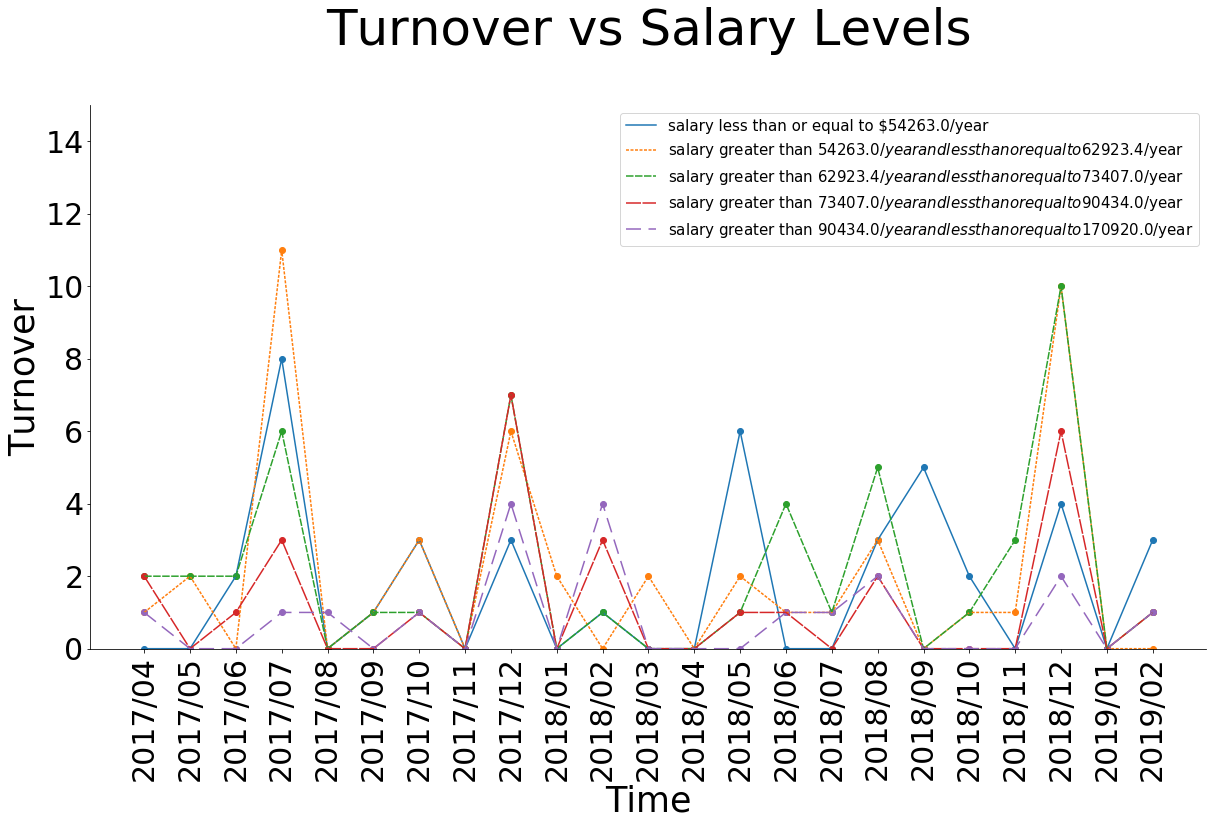

In [26]:
Eng_Salary_na["Current Salary"].median()
#/len(Eng_Salary_na["Current Salary"])#Average is 67192
linestyles = ['-', '--', '-.', ':']
x = ['2017/04','2017/05','2017/06','2017/07','2017/08','2017/09','2017/10','2017/11','2017/12','2018/01','2018/02','2018/03','2018/04','2018/05','2018/06','2018/07','2018/08','2018/09','2018/10','2018/11','2018/12','2019/01','2019/02']

dashList = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(20,5,20,5),(5,10),(1,10),(1,10,7,10)] 

counts = turnover(Eng_Salary_na,0,54263.0)
plt.scatter(x,counts)
plt.plot(x, counts,label='salary less than or equal to $54263.0/year')

counts = turnover(Eng_Salary_na,54263.0,62923.4)
plt.scatter(x,counts)
plt.plot(x, counts,'--',dashes=(2, 1),label ='salary greater than $54263.0/year and less than or equal to $62923.4/year')


counts = turnover(Eng_Salary_na,62923.4,73407.0)
plt.scatter(x,counts)
plt.plot(x, counts,'--',dashes=(5, 1),label ='salary greater than $62923.4/year and less than or equal to $73407.0/year')


counts = turnover(Eng_Salary_na,73407.0,90434.0)
plt.scatter(x,counts)
plt.plot(x, counts,'--',dashes=(10, 1),label ='salary greater than $73407.0/year and less than or equal to $90434.0/year')


counts = turnover(Eng_Salary_na,90434.0,170920.0)
plt.scatter(x,counts)
plt.plot(x, counts,'--',dashes = (10,5),label ='salary greater than $90434.0/year and less than or equal to $170920.0/year')

plt.title('Turnover vs Salary Levels',fontsize = 50,pad=60)
plt.xlabel('Time',fontsize=35)
plt.ylabel('Turnover',fontsize=35)
plt.xticks(rotation=90,fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylim(0,15)
plt.legend(fontsize=15)
#plt.rcParams["font.size"] = 20
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],['2017/04','2017/05','2017/06','2017/07','2017/08','2017/09','2017/10','2017/11','2017/12','2018/01','2018/02','2018/03','2018/04','2018/05','2018/06','2018/07','2018/08','2018/09','2018/10','2018/11','2018/12','2019/01','2019/02'],rotation=90)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
None


# Functions For Calculating Retire Rates and Hire Rates
This section builds functions for calculating retire rates and hire rates

In [27]:
def retire_rate(Dataset):
    dat_2017 = Dataset[Dataset["Year"] =="2017"]
    ls = {}
    prob=[]
    for i in ["March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2017[dat_2017["Month"] ==i]
        ls[i] = []
        for item in dat["Employee #"]:
            ls[i].append(item)
    num = 0
    for i in ls["March"]:
        if not i in ls["April"]:
            num +=1
    prob.append(num/len(ls['March']))
    
    for i in ls["April"]:
        if not i in ls["May"]:
            num +=1
    prob.append(num/len(ls['April']))

    num = 0
    for i in ls["May"]:
        if not i in ls["June"]:
            num +=1
    prob.append(num/len(ls['May']))

    num = 0
    for i in ls["June"]:
        if not i in ls["July"]:
            num +=1
    prob.append(num/len(ls['June']))

    num = 0
    for i in ls["July"]:
        if not i in ls["August"]:
            num +=1
    prob.append(num/len(ls['July']))

    num = 0
    for i in ls["August"]:
        if not i in ls["September"]:
            num +=1
    prob.append(num/len(ls['August']))
    num = 0
    for i in ls["September"]:
        if not i in ls["October"]:
            num +=1
    prob.append(num/len(ls['September']))


    num = 0
    for i in ls["October"]:
        if not i in ls["November"]:
            num +=1
    prob.append(num/len(ls['October']))
    num = 0
    for i in ls["November"]:
        if not i in ls["December"]:
            num +=1
    prob.append(num/len(ls['November']))
    dat_2018 = Dataset[Dataset["Year"] =="2018"]
    ls1 = {}
    for i in ["January","February","March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2018[dat_2018["Month"] ==i]
        ls1[i] = []
        for item in dat["Employee #"]:
            ls1[i].append(item)

    num = 0
    for i in ls["December"]:
        if not i in ls1["January"]:
            num +=1
    prob.append(num/len(ls['December']))

    num = 0
    for i in ls1["January"]:
        if not i in ls1["February"]:
            num +=1
    prob.append(num/len(ls1['January']))

    num = 0
    for i in ls1["February"]:
        if not i in ls1["March"]:
            num +=1
    prob.append(num/len(ls1['February']))

    num = 0
    for i in ls1["March"]:
        if not i in ls1["April"]:
            num +=1
    prob.append(num/len(ls1['March']))
    num = 0
    for i in ls1["April"]:
        if not i in ls1["May"]:
            num +=1
    num = 0
    prob.append(num/len(ls1['April']))
    
    for i in ls1["May"]:
        if not i in ls1["June"]:
            num +=1
    prob.append(num/len(ls1['May']))

    num = 0
    for i in ls1["June"]:
        if not i in ls1["July"]:
            num +=1
    prob.append(num/len(ls1['June']))

    num = 0
    for i in ls1["July"]:
        if not i in ls1["August"]:
            num +=1
    prob.append(num/len(ls1['July']))

    num = 0
    for i in ls1["August"]:
        if not i in ls1["September"]:
            num +=1
    prob.append(num/len(ls1['August']))

    num = 0
    for i in ls1["September"]:
        if not i in ls1["October"]:
            num +=1
    prob.append(num/len(ls1['September']))
    
    
    num = 0
    for i in ls1["October"]:
        if not i in ls1["November"]:
            num +=1
    prob.append(num/len(ls1['October']))

    num = 0
    for i in ls1["November"]:
        if not i in ls1["December"]:
            num +=1
    prob.append(num/len(ls1['November']))


    dat_2019 = Dataset[Dataset["Year"] =="2019"]
    ls2 = {}
    for i in ["January","February"]:
        dat = dat_2019[dat_2019["Month"] ==i]
        ls2[i] = []
        for item in dat["Employee #"]:
            ls2[i].append(item)
        
    num = 0
    for i in ls1["December"]:
        if not i in ls2["January"]:
            num +=1
    prob.append(num/len(ls1['December']))

    num = 0
    for i in ls2["January"]:
        if not i in ls2["February"]:
            num +=1
    prob.append(num/len(ls2['January']))
    sum = 0 
    for i in prob:
        sum = sum+i
    hire_rate = sum/len(prob)
    return(hire_rate)

def hire_rate(Dataset):
    dat_2017 = Dataset[Dataset["Year"] =="2017"]
    ls = {}
    for i in ["March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2017[dat_2017["Month"] ==i]
        ls[i] = []
        for item in dat["Employee #"]:
            ls[i].append(item)
    num = 0
    for i in ls["April"]:
        if not i in ls["March"]:
            num +=1
    prob = []
    prob.append(num/len(ls['March']))
    num = 0
    for i in ls["May"]:
        if not i in ls["April"]:
            num +=1
    prob.append(num/len(ls['April']))
    num = 0
    for i in ls["June"]:
        if not i in ls["May"]:
            num +=1
    prob.append(num/len(ls['May']))

    num = 0
    for i in ls["July"]:
        if not i in ls["June"]:
            num +=1
    prob.append(num/len(ls['June']))

    num = 0
    for i in ls["August"]:
        if not i in ls["July"]:
            num +=1
    prob.append(num/len(ls['July']))

    num = 0
    for i in ls["September"]:
        if not i in ls["August"]:
            num +=1
    prob.append(num/len(ls['August']))

    num = 0
    for i in ls["November"]:
        if not i in ls["September"]:
            num +=1
    prob.append(num/len(ls['September']))

    num = 0
    for i in ls["December"]:
        if not i in ls["November"]:
            num +=1
    prob.append(num/len(ls['November']))

    dat_2018 = Dataset[Dataset["Year"] =="2018"]
    ls1 = {}
    for i in ["January","February","March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2018[dat_2018["Month"] ==i]
        ls1[i] = []
        for item in dat["Employee #"]:
            ls1[i].append(item)

    num = 0
    for i in ls1["January"]:
        if not i in ls["December"]:
            num +=1
    prob.append(num/len(ls['December']))

    num = 0
    for i in ls1["February"]:
        if not i in ls1["January"]:
            num +=1
    prob.append(num/len(ls1['January']))

    num = 0
    for i in ls1["March"]:
        if not i in ls1["February"]:
            num +=1
    prob.append(num/len(ls1['February']))

    num = 0
    for i in ls1["April"]:
        if not i in ls1["March"]:
            num +=1
    prob.append(num/len(ls1['March']))
    num = 0
    for i in ls1["May"]:
        if not i in ls1["April"]:
            num +=1
    num = 0
    prob.append(num/len(ls1['April']))
    for i in ls1["June"]:
        if not i in ls1["May"]:
            num +=1
    prob.append(num/len(ls1['May']))

    num = 0
    for i in ls1["July"]:
        if not i in ls1["June"]:
            num +=1
    prob.append(num/len(ls1['June']))

    num = 0
    for i in ls1["August"]:
        if not i in ls1["July"]:
            num +=1
    prob.append(num/len(ls1['July']))

    num = 0
    for i in ls1["September"]:
        if not i in ls1["August"]:
            num +=1
    prob.append(num/len(ls1['August']))

    num = 0
    for i in ls1["November"]:
        if not i in ls1["September"]:
            num +=1
    prob.append(num/len(ls1['September']))

    num = 0
    for i in ls1["December"]:
        if not i in ls1["November"]:
            num +=1
    prob.append(num/len(ls1['November']))


    dat_2019 = Dataset[Dataset["Year"] =="2019"]
    ls2 = {}
    for i in ["January","February"]:
        dat = dat_2019[dat_2019["Month"] ==i]
        ls2[i] = []
        for item in dat["Employee #"]:
            ls2[i].append(item)
        
    num = 0
    for i in ls2["January"]:
        if not i in ls1["December"]:
            num +=1
    prob.append(num/len(ls1['December']))

    num = 0
    for i in ls2["February"]:
        if not i in ls2["January"]:
            num +=1
    prob.append(num/len(ls2['January']))
    sum = 0 
    for i in prob:
        sum = sum+i
    hire_rate = sum/len(prob)
    return(hire_rate)


# Salary Growth Probability/the number of salary increse per year/Promotion_PROB_PER_EMP  VS. Job Position

Using a bar chart to determine whether there is a relationship between employees' Salary Growth Probability and Job Position

y-axis: the number of salary increse per year

x-axis: Job Position

Result: There is a relationship between employees' Salary Growth Probability and Job Position

In [28]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
identical_emp = Remove(Eng_Salary_na["Employee #"])
identical_pos = Remove(Eng_Salary_na["Position Description"])
employ_infor = {}
for i in identical_emp:
    employ_infor[i] = []
    for salary in Eng_Salary_na[Eng_Salary_na['Employee #']==i]['Current Salary']:
            employ_infor[i] = employ_infor[i]+[salary]
employee_promotion_pro = {}
for item in employ_infor: 
    employee_promotion_pro[item] = []
    change_times = len(Remove(employ_infor[item]))
    length = len(employ_infor[item])
    if length>=12:
        salary_increasing_period = change_times/(length/12)
    else:
        salary_increasing_period = change_times/length
    employee_promotion_pro[item] = salary_increasing_period

employee_promotion_pro_final={}
title_list = []
for name in employee_promotion_pro:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]
                title_list.append(title)
                break
            else:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]+employee_promotion_pro_final[title]
                break

In [29]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum
for position in employee_promotion_pro_final:
    employee_promotion_pro_final[position]=(listsum(employee_promotion_pro_final[position]))/(len(employee_promotion_pro_final[position]))
orderlist = sorted(employee_promotion_pro_final, key=employee_promotion_pro_final.get, reverse=True)
orderdict = {}
for i in orderlist:
    orderdict[i] = employee_promotion_pro_final[i]

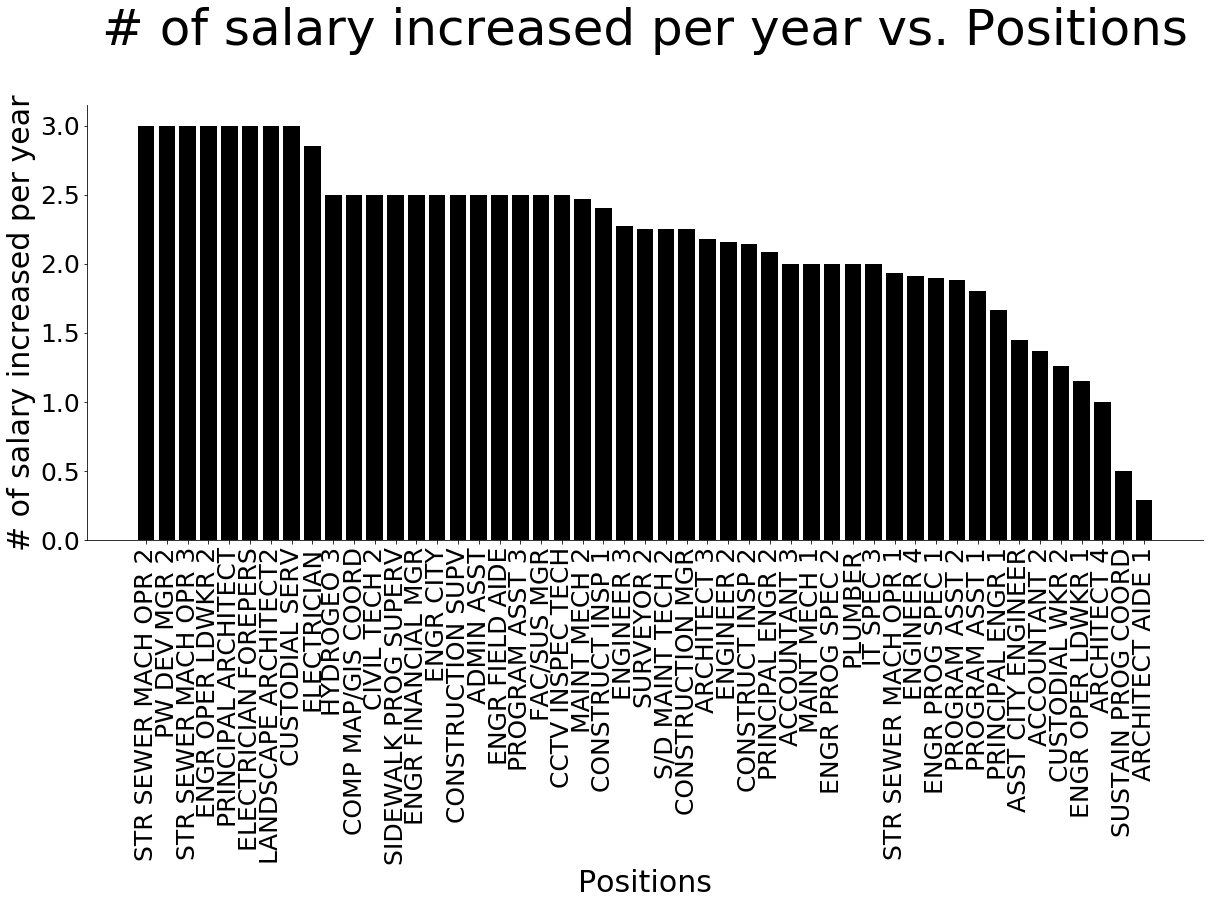

In [30]:
plt.rcParams["font.size"] = 25
plt.bar(*zip(*orderdict.items()),color='black')
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.xticks(rotation='vertical')
plt.title('# of salary increased per year vs. Positions',fontsize=50,pad=60)
plt.ylabel('# of salary increased per year',fontsize=30)
plt.xlabel('Positions',fontsize=30)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
None

# Employees' Salary Growth Rates/employee_promotion_rate VS. Job Position
Using a bar chart to determine whether there is a relationship between employees' average yearly salary Growth Rates and Job Position

y-axis: average yearly salary Growth Rates

x-axis: Job Position

Result: There is a relationship between employees' average yearly salary Growth Rates and Job Position

In [31]:
#Promotion_PROB_PER_EMP
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
identical_emp = Remove(Eng_Salary_na["Employee #"])
identical_pos = Remove(Eng_Salary_na["Position Description"])
employ_infor = {}
for i in identical_emp:
    employ_infor[i] = []
    for salary in Eng_Salary_na[Eng_Salary_na['Employee #']==i]['Current Salary']:
            employ_infor[i] = employ_infor[i]+[salary]
employee_promotion_rate = {}
for item in employ_infor: 
    num = 0
    employee_promotion_rate[item] = 0
    for i in range(1,len(employ_infor[item])):
        salary_increasing_rates = 0
        if employ_infor[item][i]!=employ_infor[item][i-1]:
            salary_increasing_rates = (employ_infor[item][i] - employ_infor[item][i-1])/employ_infor[item][i-1]
            #employee_promotion_rate[item] = salary_increasing_rates
            num = num+1
        employee_promotion_rate[item] = salary_increasing_rates + employee_promotion_rate[item]
    if num != 0:
        employee_promotion_rate[item] = employee_promotion_rate[item]/num
employee_promotion_rate_final={}
title_list = []
for name in employee_promotion_rate:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                employee_promotion_rate_final[title]=[employee_promotion_rate[name]]
                title_list.append(title)
                break
            else:
                employee_promotion_rate_final[title]=[employee_promotion_rate[name]]+employee_promotion_rate_final[title]
                break

In [32]:
for i in identical_emp:
    employ_infor[i] = []
    for salary in Eng_Salary_na[Eng_Salary_na['Employee #']==i]['Current Salary']:
            employ_infor[i] = employ_infor[i]+[salary]
employee_promotion_rate_below = {}
for item in employ_infor: 
    num = 0
    employee_promotion_rate_below[item] = 0
    for i in range(1,len(employ_infor[item])):
        salary_increasing_rates = 0
        if employ_infor[item][i]!=employ_infor[item][i-1]:
            salary_increasing_rates = (employ_infor[item][i] - employ_infor[item][i-1])/employ_infor[item][i-1]
            #employee_promotion_rate[item] = salary_increasing_rates
            num = num+1
        employee_promotion_rate_below[item] = salary_increasing_rates + employee_promotion_rate_below[item]
    if num != 0:
        employee_promotion_rate_below[item] = employee_promotion_rate_below[item]/num


In [33]:
total = 0
length = 0
for i in employee_promotion_rate_below:
    total = employee_promotion_rate_below[i] + total
    length = length + 1

0.026533214956438116

In [34]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return(theSum)

for position in employee_promotion_rate_final:
    employee_promotion_rate_final[position]=(listsum(employee_promotion_rate_final[position]))/(len(employee_promotion_rate_final[position]))
orderlist = sorted(employee_promotion_rate_final, key=employee_promotion_rate_final.get, reverse=True)
orderdict = {}
for i in orderlist:
    orderdict[i] = employee_promotion_rate_final[i]

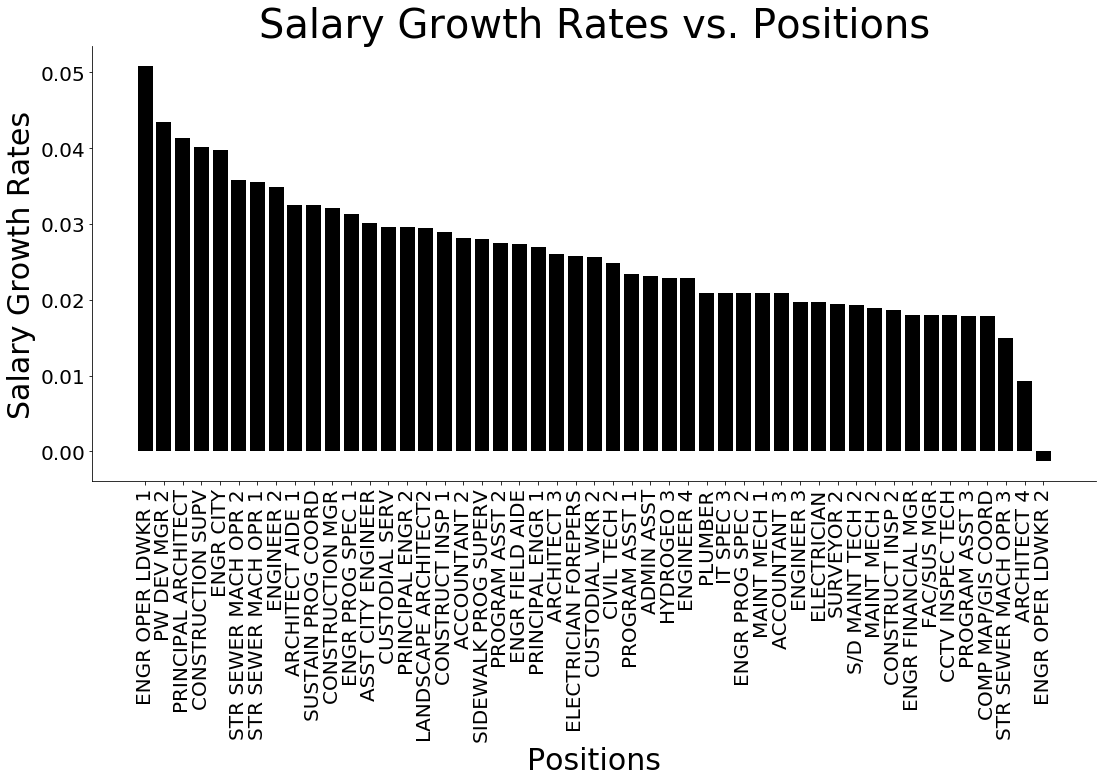

In [35]:
plt.rcParams["font.size"] = 20
plt.bar(*zip(*orderdict.items()),color='black')
fig = plt.gcf()
fig.set_size_inches(18,8)
plt.xticks(rotation='vertical')
plt.title('Salary Growth Rates vs. Positions',fontsize=40)
plt.ylabel('Salary Growth Rates',fontsize=30)
plt.xlabel('Positions',fontsize=30)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
None

# Run Simulator
-I use 2017 as the base year and use data from 2017 to generate simulations.

-For every employee, my simulator will do three steps. 

1.The python will generate a random number if this number is below the hire rates: the simulator will hire an employee, and the starting salary is based on the average salary for this position in the previous year. 

2.The python will generate another random variable, if this number is less than the retire rates, the current employee will retire. 

3.The hire rates and retire rates will either on depend the position of employees or using the overall average rates. 
Current Salary* (1+Salary Growth Rates)^Growth Times-to predict the salary of the individual employees for next year. 

-1000 times for each year 

**Input Variable**: 

Hire Rates
    
    Overall Average(<= 24 available data)
    
    Based on Positions(>24 available data)

Retire Rates
    
    Overall Average(<= 24 available data)
    
    Based on Positions(>24 available data)

Position of Employees

Salary Growth Rates/employee_promotion_rate (Depends on positions)

Salary Growth Probability(The number of times salary increased in a year)

Current Salary


In [37]:
##Run Simulator

#Starting salary based on different positions
employ_infor
start_salary={}
title_list = []
for name in employ_infor:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                title_list.append(title)
                start_salary[title]=[employ_infor[name]]
                break
start = Eng_Salary_na[Eng_Salary_na["Year"]=='2018'].groupby("Position Description").mean()

salary = {}
#ID in simulation
next_id = 1000

#Hire Rate & Retire Rate
RETIRE_PROB_PER_EMP = retire_rate(Eng_Salary_na)
HIRE_PROB = hire_rate(Eng_Salary_na)

#Classify current salary as low(<50000),meddle (500000-100000), and high(>100000)
med_sal = Eng_Salary_na[Eng_Salary_na["Current Salary"] == range(500000, 100000)]
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
med_list = Remove(med_sal["Position Description"])
low_sal = Eng_Salary_na[Eng_Salary_na["Current Salary"]<50000]
low_list = Remove(low_sal["Position Description"])

In [38]:
#Simulator
def gen_emp_id():
    global next_id
    next_id += 1
    return str(next_id)

lst = {}
agency = {}
for i, row in Eng_Salary_na[Eng_Salary_na['Year'] == '2017'].iterrows():
    agency[gen_emp_id()] = {"salary": row['Current Salary'], "position": "engineer","position description":row['Position Description']}

#Main simulation function
def simulate_one_year(prior_employees):
    employees = copy.deepcopy(prior_employees)

    for employee in employees.values():
        if employee["position description"] in med_list:
            if employee["salary"] < 150000:
                employee["salary"] = employee["salary"] *((1+employee_promotion_rate_final[employee['position description']])**employee_promotion_pro_final[employee['position description']])
        elif employee["position description"] in low_list:
            if employee["salary"] < 100000:
                employee["salary"] = employee["salary"] *((1+employee_promotion_rate_final[employee['position description']])**employee_promotion_pro_final[employee['position description']])
        
        else: 
            if employee["salary"]<250000:
                employee["salary"] = employee["salary"] *((1+employee_promotion_rate_final[employee['position description']])**employee_promotion_pro_final[employee['position description']])
    emp_ids = list(employees.keys())
    for eid in emp_ids:
        position =employees[eid]["position description"]
        retire = RETIRE_PROB_PER_EMP
        hire = HIRE_PROB
        if random.random() < retire:
            employees.pop(eid)
        
        if random.random() < hire:
            employees[gen_emp_id()] = {"salary":start.loc[position]["Current Salary"], "position": "engineer","position description":position}
        
    return employees




In [39]:
#simulate several years
def sim_years(start, years):
    history = [start]
    for i in range(years):
        history.append(simulate_one_year(history[-1]))
    return history

In [40]:
history = sim_years(agency, 10)

In [41]:
def employees_each_year(history):
    count = []
    for snapshot in history:
        count.append(len(snapshot)//10)
    return pd.Series(count)

def salary_each_year(history):
    salaries = []
    for snapshot in history:
        total = 0
        for emp in snapshot.values():
            total = total+ emp["salary"]/10
            
        salaries.append(total)
    return pd.Series(salaries)

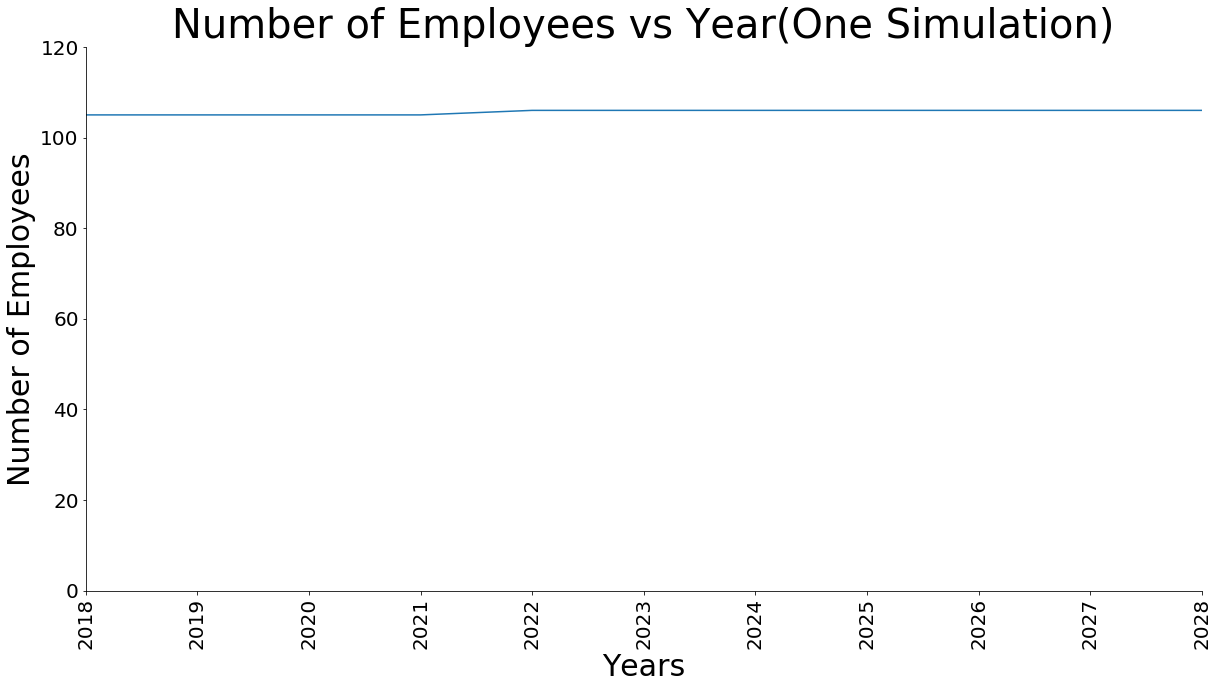

In [42]:
#The Number of Employees VS. Year(One Simulation)
plt.rcParams["font.size"] = 20
s = employees_each_year(history)
ax = s.plot.line(xlim=0, ylim=0,figsize=(20,10))
ax.set_xlabel("Years",fontsize  = 30)
ax.set_ylabel("Number of Employees",fontsize  = 30)
ax.set_title('Number of Employees vs Year(One Simulation)',fontsize  = 40)
ax.set_ylim(top=120)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028'],rotation=90)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
None

c:\users\xi97x\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


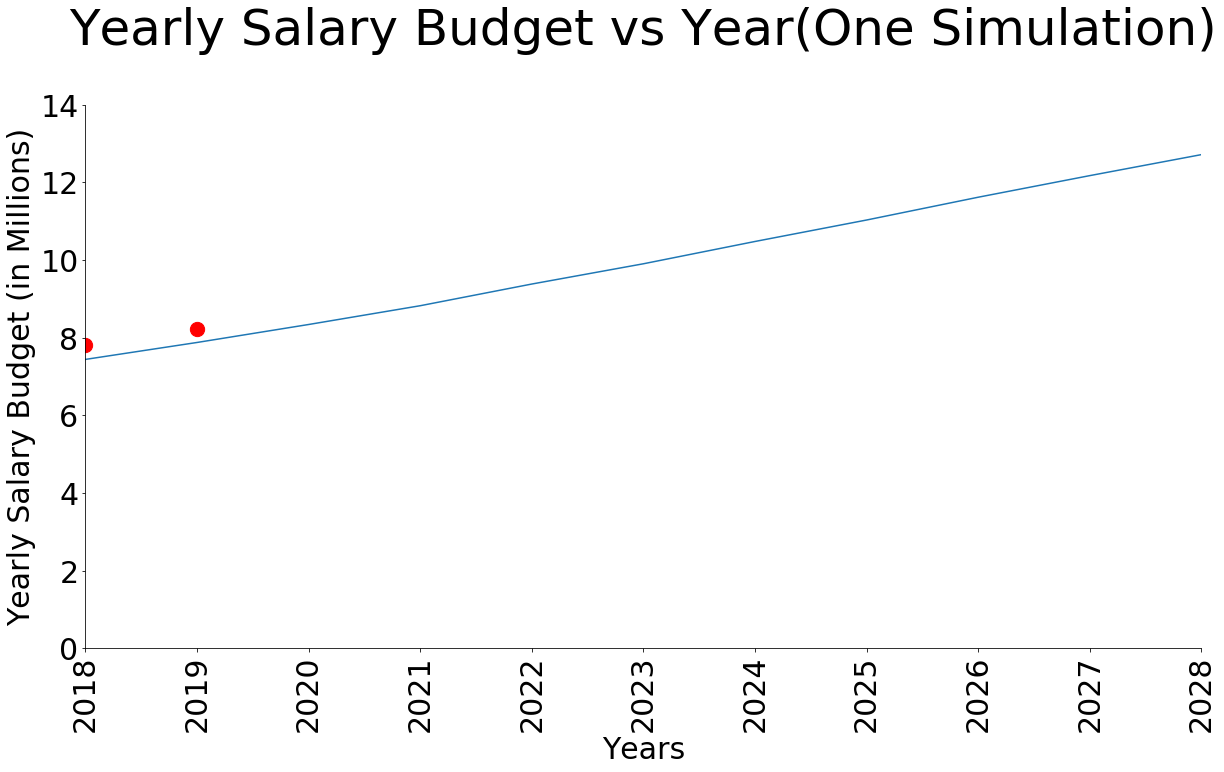

In [43]:
#Yearly Salary Budget VS Year(One Simulation)
#red dots represent actual budget and blue lnie represents predictions
plt.rcParams["font.size"] = 30
s = salary_each_year(history) / 1000000
ax = s.plot.line(xlim=0, ylim=0,figsize=(20,10))
ax.set_xlabel("Years",fontsize = 30)
ax.set_ylabel("Yearly Salary Budget (in Millions)",fontsize = 30)
ax.set_title('Yearly Salary Budget vs Year(One Simulation)',fontsize = 50,pad=60) 
ax = plt.subplot()
ax.scatter([1],[8.23],color = 'red',s=204)
ax.scatter([0],[7.81],color = 'red',s=204)
ax.set_ylim(top=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028'],rotation=90)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
None

In [50]:
#1000 simulations for 2020
salaries = []

for i in range(1000):
    history = sim_years(agency, 10)
    total = 0
    for employee in history[3].values():
        total =total+ employee["salary"]/10
    salaries.append(total)

# let's see a few outcomes:
sum = 0
for i in salaries:
    sum = i + sum


8.769409982622577

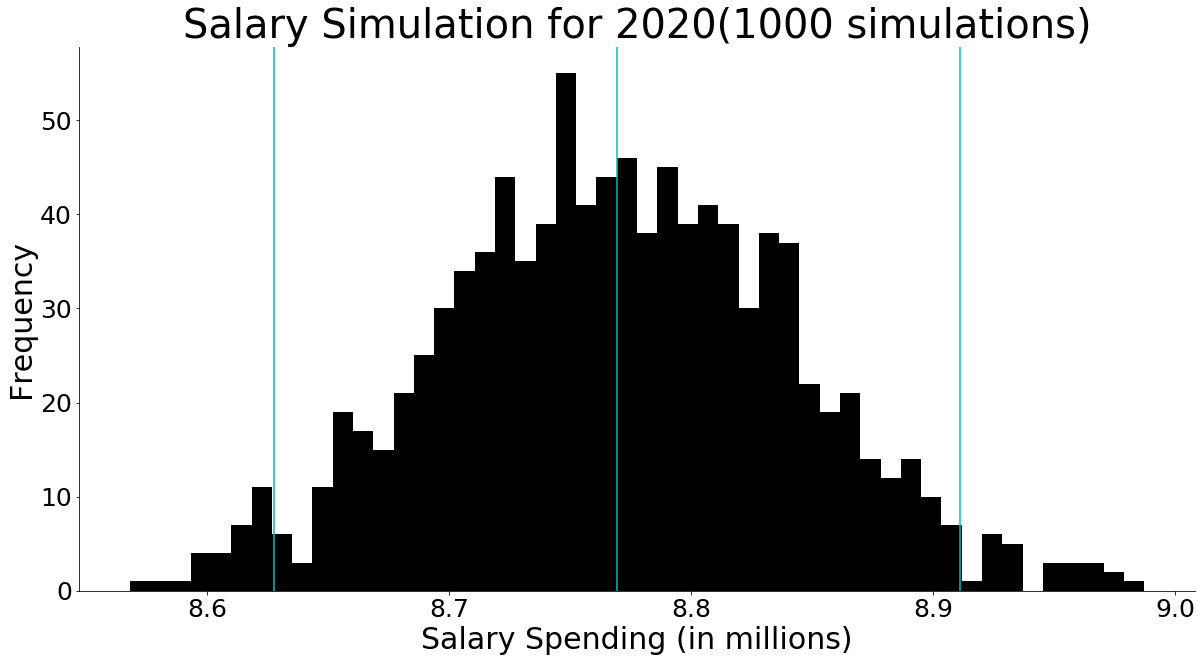

In [51]:
#Salary Distribution for 2020(1000 simulation) with median, 25 percentile, and 75 percentile
s = pd.Series(salaries) / 1000000  
plt.rcParams["font.size"] = 25
ax = s.plot.hist(color = 'k',bins=50)
ax.set_xlabel("Salary Spending (in millions)",fontsize = 30)
ax.set_ylabel("Frequency",fontsize = 30)
plt.axvline(sum/len(salaries)/1000000,color='c')
plt.axvline((sum/len(salaries)-1.96*np.std(salaries))/1000000,color='c')
plt.axvline((sum/len(salaries)+1.96*np.std(salaries))/1000000,color='c')
plt.title('Salary Simulation for 2020(1000 simulations)',fontsize = 40)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
(sum/len(salaries)+1.96*np.std(salaries))/1000000
sum/len(salaries)
sum/len(salaries)/1000000

In [52]:
import numpy as np
x = np.sort(salaries)/1000000
y = np.arange(1,len(x)+1)/len(x)

(8.567899165487828, 8.987222992105766)

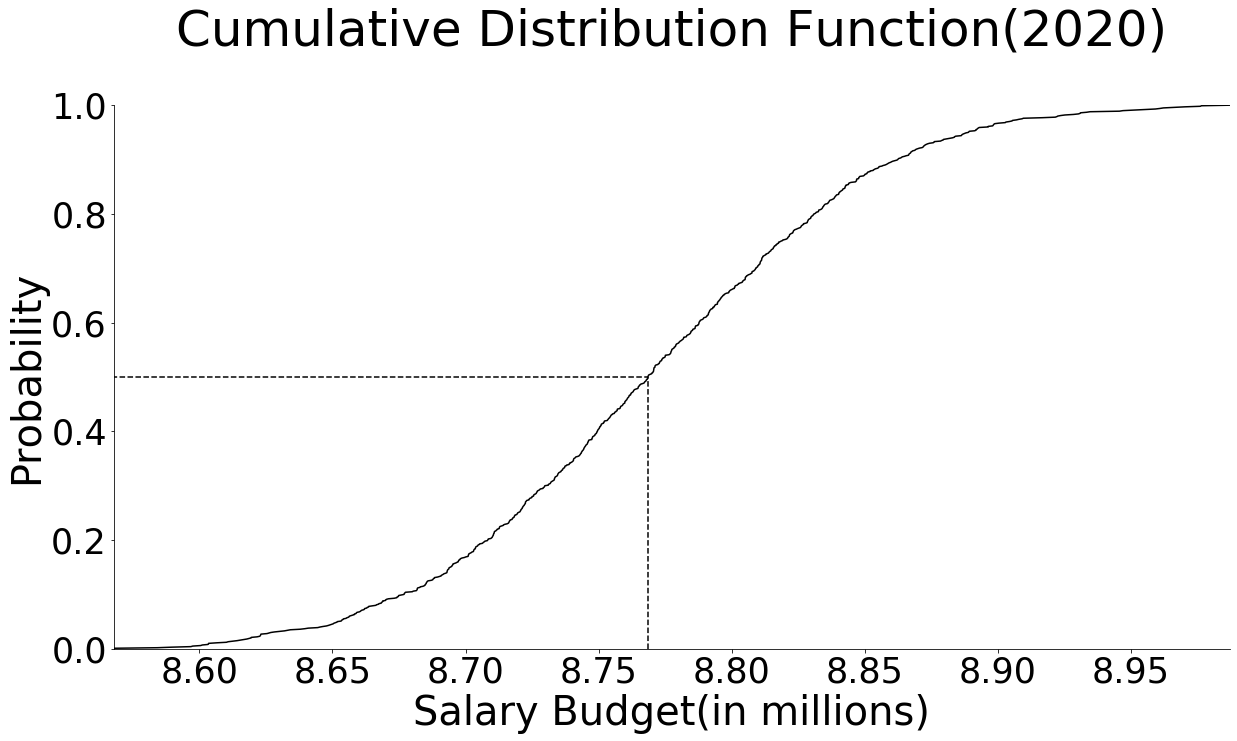

In [57]:
#Cumulative Distribution Function for 2020 (1000 simulation)
plt.plot(x,y,color = "black")
plt.title('Cumulative Distribution Function(2020)',fontsize=50,pad=60)
plt.vlines(np.median(x), 0, 0.5, linestyle="dashed")
plt.hlines(0.5, 0, np.median(x), linestyle="dashed")
plt.ylabel('Probability',fontsize=40)
plt.xlabel('Salary Budget(in millions)',fontsize=40)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.ylim(0, max(y))
plt.xlim(min(x), max(x))

In [54]:
#1000 simulations for 2028
salaries = []

for i in range(1000):
    history = sim_years(agency, 10)
    total = 0
    for employee in history[10].values():
        total =total+ employee["salary"]/10
    salaries.append(total)

# let's see a few outcomes:
sum = 0
for i in salaries:
    sum = i + sum

12.546844631113533

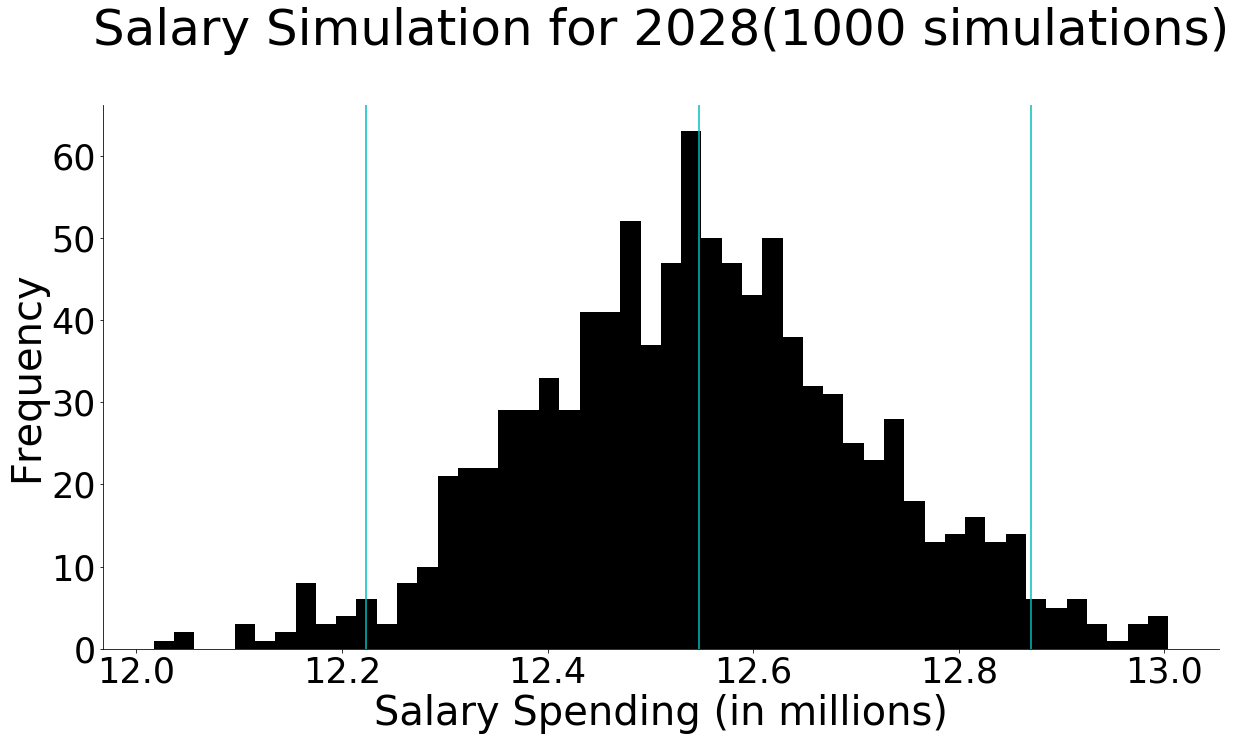

In [59]:
#Salary Distribution for 2028(1000 simulation) with median, 25 percentile, and 75 percentile
s = pd.Series(salaries) / 1000000  
plt.rcParams["font.size"] = 35
ax = s.plot.hist(color = 'k',bins=50)
ax.set_xlabel("Salary Spending (in millions)",fontsize = 40)
ax.set_ylabel("Frequency",fontsize = 40)
plt.axvline(sum/len(salaries)/1000000,color='c')
plt.axvline((sum/len(salaries)-1.96*np.std(salaries))/1000000,color='c')
plt.axvline((sum/len(salaries)+1.96*np.std(salaries))/1000000,color='c')
plt.title('Salary Simulation for 2028(1000 simulations)',fontsize = 50,pad=60)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
(sum/len(salaries)+1.96*np.std(salaries))/1000000
sum/len(salaries)
sum/len(salaries)/1000000